In [3]:
import os
import joblib
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
import pandas as pd

file_path = r"C:\BDSE33-Final_topic\CSV\飲料店總表0307final01_補上人氣_補值_hg.csv"

dataset = pd.read_csv(file_path, encoding='ANSI')

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4742 entries, 0 to 4741
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           4742 non-null   object 
 1   star                           4742 non-null   float64
 2   comment                        4742 non-null   int64  
 3   class                          4742 non-null   object 
 4   address                        4742 non-null   object 
 5   latitude                       4742 non-null   float64
 6   longitude                      4742 non-null   float64
 7   school_counts                  4742 non-null   int64  
 8   drink_counts                   4742 non-null   int64  
 9   train_counts                   4742 non-null   int64  
 10  youbike_counts                 4742 non-null   int64  
 11  bus_counts                     4742 non-null   int64  
 12  park_counts                    4742 non-null   i

In [15]:
selected_data = dataset[
    [
        "star",
        "school_counts",
        "drink_counts",
        "train_counts",
        "youbike_counts",
        "bus_counts",
        "park_counts",
        "night_market_counts",
        "sports_facilities_counts",
        "mrt_counts",
        "movie_theater_counts",
        "hospital_counts",
        "salary_income_median",
        "people_flow_mean",
        "knock_down_price_mean",
        "weekend_open",
        "road_area_ratio",
        "age",
        "weekday_working_hours_average",
        # "comment",
        # "people_flow_average",
        "popularity",
    ]
]


In [16]:
selected_data_heat_map = dataset[
    [
        # "star",
        "school_counts",
        "drink_counts",
        # "train_counts",
        "youbike_counts",
        "bus_counts",
        "park_counts",
        # "night_market_counts",
        "sports_facilities_counts",
        "mrt_counts",
        "movie_theater_counts",
        "hospital_counts",
        "salary_income_median",
        # "people_flow_mean",
        # "knock_down_price_mean",
        "weekend_open",
        "road_area_ratio",
        "age",
        # "weekday_working_hours_average",
        # "comment",
        # "people_flow_average",
        "popularity",
    ]
]

C:\Users\student\AppData\Local\Temp\ipykernel_4516\3021023438.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Y_classification_pd.groupby("category")["value"]


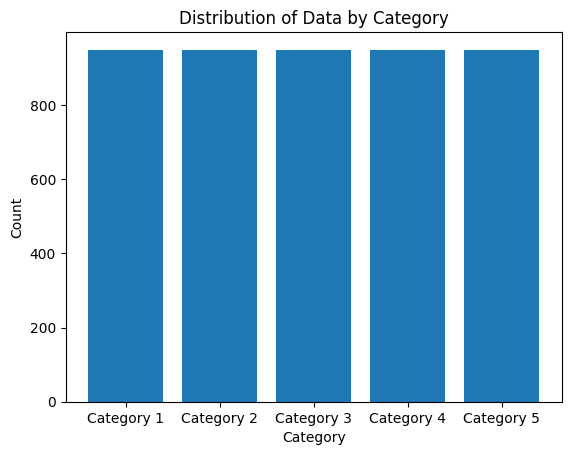

C:\Users\student\AppData\Local\Temp\ipykernel_4516\3021023438.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["popularity_category"] = pd.cut(
C:\Users\student\AppData\Local\Temp\ipykernel_4516\3021023438.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["popularity_category"] = selected_data["popularity_category"].fillna(5)


(popularity_category
 1    949
 2    948
 3    948
 4    948
 5    949
 Name: count, dtype: int64,
      category         最小值           最大值   數量
 0  Category 1    0.000000      3.254760  949
 1  Category 2    3.295444     85.328799  948
 2  Category 3   85.486327    313.433695  948
 3  Category 4  313.641095    861.541994  948
 4  Category 5  861.621606  14379.516990  949)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假設的 selected_data 和 'popularity' 欄位數據
np.random.seed(0)

# 使用 pd.qcut 進行分類
Y_classification_pd = pd.DataFrame({"value": selected_data["popularity"]})
Y_classification_pd["category"] = pd.qcut(
    Y_classification_pd["value"],
    q=5,
    labels=["Category 1", "Category 2", "Category 3", "Category 4", "Category 5"],
)

# 分組並獲得統計信息
summary_df = (
    Y_classification_pd.groupby("category")["value"]
    .agg([("最小值", "min"), ("最大值", "max"), ("數量", "size")])
    .reset_index()
)

# 繪製數據分布
category_counts = Y_classification_pd["category"].value_counts().sort_index()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of Data by Category")
plt.show()

# 建立分類
value_category_ranges = [
    summary_df.loc[0, "最小值"],  # 第一類別的最小值
    summary_df.loc[1, "最小值"],  # 第二類別的最小值
    summary_df.loc[2, "最小值"],  # 第三類別的最小值
    summary_df.loc[3, "最小值"],  # 第四類別的最小值
    summary_df.loc[4, "最小值"],  # 第五類別的最小值
    summary_df.loc[4, "最大值"],  # 第五類別的最大值
]

# 使用 pd.cut 根據新的範圍劃分 'popularity' 欄位
selected_data["popularity_category"] = pd.cut(
    selected_data["popularity"],
    bins=value_category_ranges,
    right=False,  # 包括左邊界，排除右邊界
    labels=[1, 2, 3, 4, 5],
)

# 将超出范围的值设为最大范围
selected_data["popularity_category"] = selected_data["popularity_category"].fillna(5)

# selected_data['popularity_category'] = selected_data['popularity_category'].astype(int)

# 打印新的分類結果和每類的數量
selected_data["popularity_category"].value_counts().sort_index(), summary_df

In [19]:
# 設定模型輸入x
X = selected_data.drop(columns=["popularity", "popularity_category"])
y = selected_data[["popularity_category"]]

# 分割訓練和測試
from sklearn.model_selection import train_test_split

# test_size 切的尺寸 30% random_state讓抽取可以是穩定的結果(第一次抽根第十次抽是一樣的)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=25
)

In [25]:
# 設定模型檔案所在的路徑
model_path = 'C:\\BDSE33-Final_topic\\python\\機械學習\\模型\\'

# 假設您的5個模型檔案名稱分別為'your_model1.joblib', 'your_model2.joblib', ..., 'your_model5.joblib'
model_filenames = ['AdaBoost_model_best.joblib', 'Bayesion_classifier_model_best.joblib', 'best_randomforest_model.joblib', 'LogisticRegression_model_best.joblib', 'MultinomialNB_model_best.joblib', 'SVM_svc_best.joblib']

# 加載所有模型
models = [joblib.load(os.path.join(model_path, model_filename)) for model_filename in model_filenames]



# 切分數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化梯度提升機模型
# 可以透過調整n_estimators、learning_rate和max_depth等參數進行優化
# 請根據您的數據和需求進行調整
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 將已經訓練好的模型作為初始估計器傳遞給GradientBoostingClassifier
gb_model.estimators_ = models

# 訓練模型
gb_model.fit(X_train, y_train)

# 預測測試集
y_pred = gb_model.predict(X_test)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator GaussianNB from version 1.4.1.post1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MultinomialNB from version 1.4.1.post1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A 

Accuracy: 0.49631190727081137


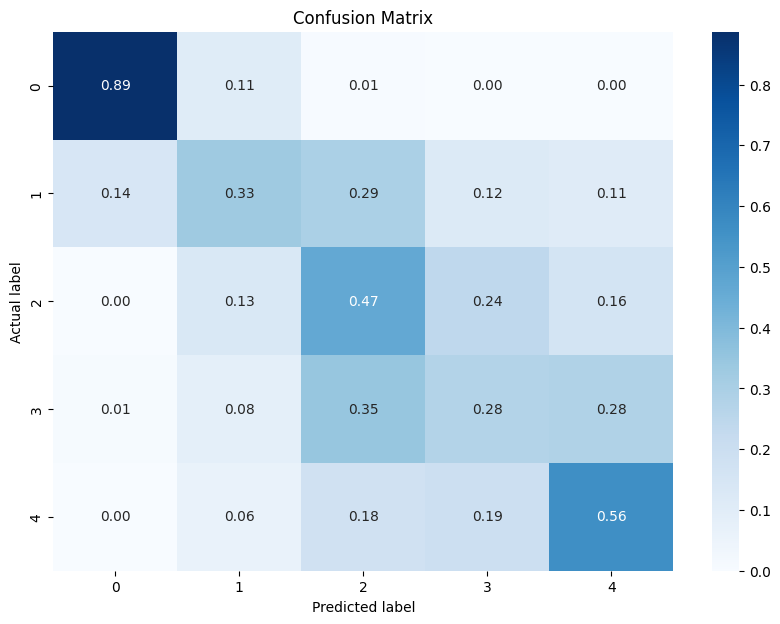

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 生成混淆矩陣
cm = confusion_matrix(y_test, y_pred)


# 轉換為比例
cm_ratio = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

# 使用Seaborn畫出混淆矩陣的熱力圖
plt.figure(figsize=(10, 7))
sns.heatmap(cm_ratio, annot=True, fmt=".2f", cmap="Blues")  # fmt='.2f' 指定顯示兩位小數
plt.title("Confusion Matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()